## **1. Data Preprocessing and Cleaning**
*Objective: Clean and filter the dataset for 2015, remove leap days, and prepare the data for analysis.*

In [ ]:
import pandas as pd
# Load the temperature data
temperature_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\temperature.csv")
# Convert 'date' column to datetime format so we can work with it easily
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
# Remove leap days (February 29th)
temperature_df = temperature_df[~((temperature_df['Date'].dt.month == 2) & (temperature_df['Date'].dt.day == 29))]
# Keep data for 2005-2014
temperature_df = temperature_df[(temperature_df['Date'].dt.year >= 2005) & (temperature_df['Date'].dt.year <= 2014)]
# Remove rows with missing data
temperature_df = temperature_df.dropna()
# Print the first few rows to check if everything looks good
print(temperature_df.head())


#### **Explanation**
*We load the temperature dataset and convert the date column to datetime format for easy manipulation.
We remove the leap day (February 29th) to avoid skewing the results, as it’s not part of the regular year cycle.
Filter the data for the years 2005-2014 and keep only the necessary columns.*

#### **Modules Used**

**pandas** Used for data manipulation and cleaning.
No additional out-of-box modules were necessary for this step.

# **2. Plotting Record High and Low Temperatures (2005-2014)**
_Objective: Visualize the record high and low temperatures for each day of the year (2005-2014) using a line plot. Shade the area between the record high and record low temperatures._

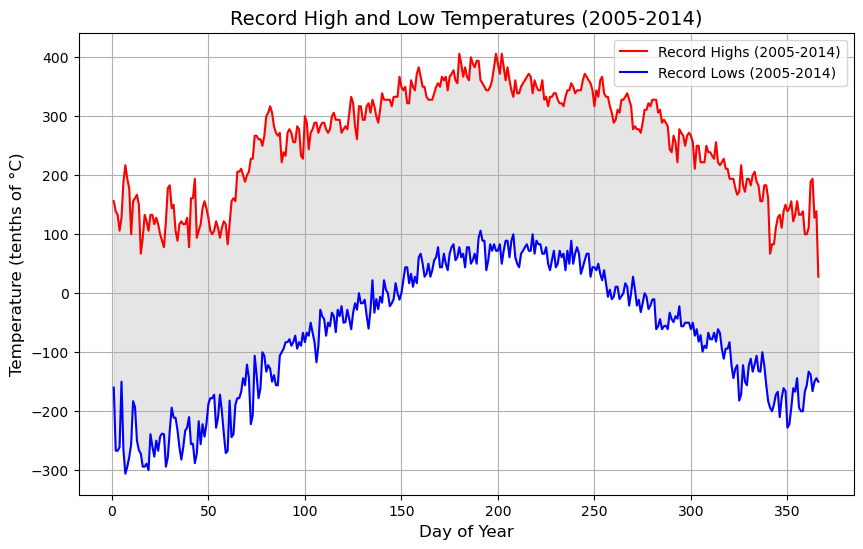

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
# Remove leap days (February 29th)
temperature_df = temperature_df[~((temperature_df['Date'].dt.month == 2) & (temperature_df['Date'].dt.day == 29))]
# Keep data for 2005-2014
temperature_df = temperature_df[(temperature_df['Date'].dt.year >= 2005) & (temperature_df['Date'].dt.year <= 2014)]
# Remove rows with missing data
temperature_df = temperature_df.dropna()
# Extract the day of the year (1 to 365)
temperature_df['day_of_year'] = temperature_df['Date'].dt.dayofyear
# Find the highest and lowest temperatures for each day of the year
record_highs = temperature_df[temperature_df['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = temperature_df[temperature_df['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()
# Plot the record high and low temperatures
plt.figure(figsize=(10, 6))
plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='blue')
# Shade the area between the highs and lows
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='gray', alpha=0.2)
# Add labels and title
plt.title('Record High and Low Temperatures (2005-2014)', fontsize=14)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### **Explanation**
_Group data by day of the year and calculate the maximum and minimum temperatures for each day.
Plot these values on a line graph and shade the area between the highs and lows to provide a clear visual representation._
#### **Explanation of the plot**
**fill_between** is used to shade the area between the high and low temperatures to visualize the range.
### **Modules Used**
**matplotlib.pyplot** This module is used for plotting, which is ideal for visualizing temperature trends.

# **3. Overlaying 2015 Data Breaking the 2005-2014 Records**
*Objective: Highlight days in 2015 where temperatures broke the record high or low set between 2005-2014.*



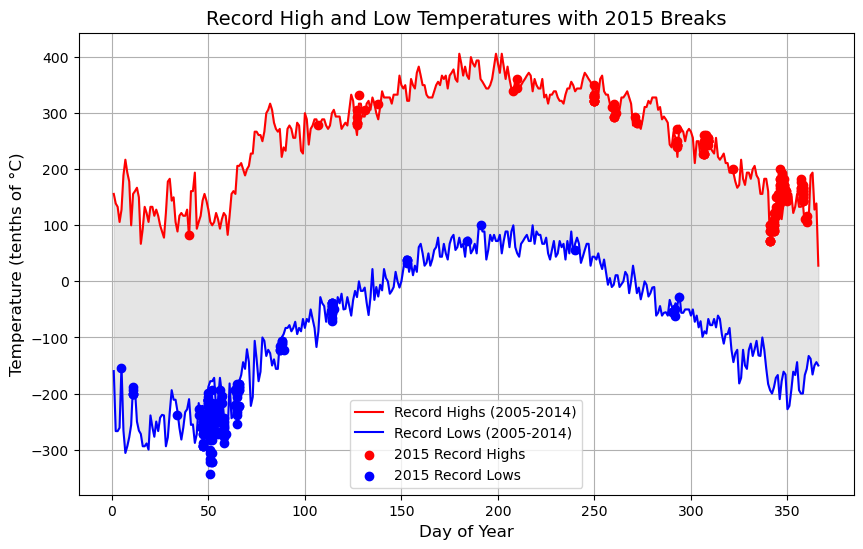

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the temperature data for 2005-2014
temperature_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\temperature.csv")
temperature_df['Date'] = pd.to_datetime(temperature_df['Date'])
# Remove leap days (February 29th)
temperature_df = temperature_df[~((temperature_df['Date'].dt.month == 2) & (temperature_df['Date'].dt.day == 29))]
# Keep data for 2005-2014
temperature_df = temperature_df[(temperature_df['Date'].dt.year >= 2005) & (temperature_df['Date'].dt.year <= 2014)]
# Extract the 'day_of_year' for 2005-2014
temperature_df['day_of_year'] = temperature_df['Date'].dt.dayofyear
# Find the record highs and lows for 2005-2014
record_highs = temperature_df[temperature_df['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
record_lows = temperature_df[temperature_df['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()
# Load the temperature data for 2015
temperature_2015_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\temperature.csv")
temperature_2015_df['Date'] = pd.to_datetime(temperature_2015_df['Date'])
# Filter the data for the year 2015
temperature_2015_df = temperature_2015_df[temperature_2015_df['Date'].dt.year == 2015]
# Extract the 'day_of_year' for 2015
temperature_2015_df['day_of_year'] = temperature_2015_df['Date'].dt.dayofyear
# Find where the 2015 data breaks the records (compared by day of year)
record_high_2015 = temperature_2015_df[(temperature_2015_df['Element'] == 'TMAX') & (temperature_2015_df['Data_Value'] > temperature_2015_df['day_of_year'].map(record_highs))]
record_low_2015 = temperature_2015_df[(temperature_2015_df['Element'] == 'TMIN') &  (temperature_2015_df['Data_Value'] < temperature_2015_df['day_of_year'].map(record_lows))]
# Plotting the results
plt.figure(figsize=(10, 6))
# Plot record highs and lows (2005-2014)
plt.plot(record_highs.index, record_highs.values, label='Record Highs (2005-2014)', color='red')
plt.plot(record_lows.index, record_lows.values, label='Record Lows (2005-2014)', color='blue')
# Shade the area between the record high and low
plt.fill_between(record_highs.index, record_highs.values, record_lows.values, color='gray', alpha=0.2)
# Add 2015 points where the records were broken
plt.scatter(record_high_2015['day_of_year'], record_high_2015['Data_Value'], color='red', label='2015 Record Highs', zorder=5)
plt.scatter(record_low_2015['day_of_year'], record_low_2015['Data_Value'], color='blue', label='2015 Record Lows', zorder=5)
# Add labels and title
plt.title('Record High and Low Temperatures with 2015 Breaks', fontsize=14)
plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### **Explanation**

_For each day in 2015, check if the recorded temperature surpasses the record high or falls below the record low from the previous years._
_Use scatter plots to overlay these data points on the original graph._
#### **Modules Used**

**matplotlib** Used for visualizing the trends.
The logic relies on comparing 2015 data against records from 2005-2014.

**Description:**
Leap days (February 29th) are removed from the dataset to avoid affecting the analysis and visualization of temperatures.

# **4. Visualizing Stations Near Ann Arbor, Michigan**
*Objective: Plot the stations around Ann Arbor, Michigan (within 100 km).*

In [5]:
import pandas as pd
import folium
import math
from IPython.display import display
# Load the station data (BinSize.csv)
binsize_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\BinSize.csv")
# Ann Arbor's latitude and longitude
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430
# Function to calculate distance between two lat/lon points using a simple formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate conversion from degrees to kilometers
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    return math.sqrt(lat_diff**2 + lon_diff**2) * 111  # 111 km per degree of latitude
# Filter stations within 100 km of Ann Arbor
stations_near_ann_arbor = binsize_df[binsize_df.apply(lambda row: calculate_distance(ann_arbor_lat, ann_arbor_lon, row['LATITUDE'], row['LONGITUDE']) <= 100,axis=1)]
# Create a map centered around Ann Arbor and 
map_ = folium.Map(location=[ann_arbor_lat, ann_arbor_lon], zoom_start=10)
# Add markers for each station near Ann Arbor
for _, station in stations_near_ann_arbor.iterrows():folium.Marker([station['LATITUDE'], station['LONGITUDE']], popup=station['NAME']).add_to(map_)
display(map_)
print("Map is displayed.")


Map is displayed.


#### __Explanation__

_We use latitude and longitude information to calculate the distance from Ann Arbor, Michigan, and filter stations within 100 km.
Then, the locations of these stations are plotted on a map using the folium library._
#### __Modules Used__

__folium__ Used to create interactive maps to display station locations. This is a great out-of-box solution for creating maps with markers.

# **5. Plotting Temperature Trends for 2015 Near Ann Arbor**
_Objective: Plot the temperature trends (TMAX and TMIN) for 2015 near Ann Arbor, Michigan._

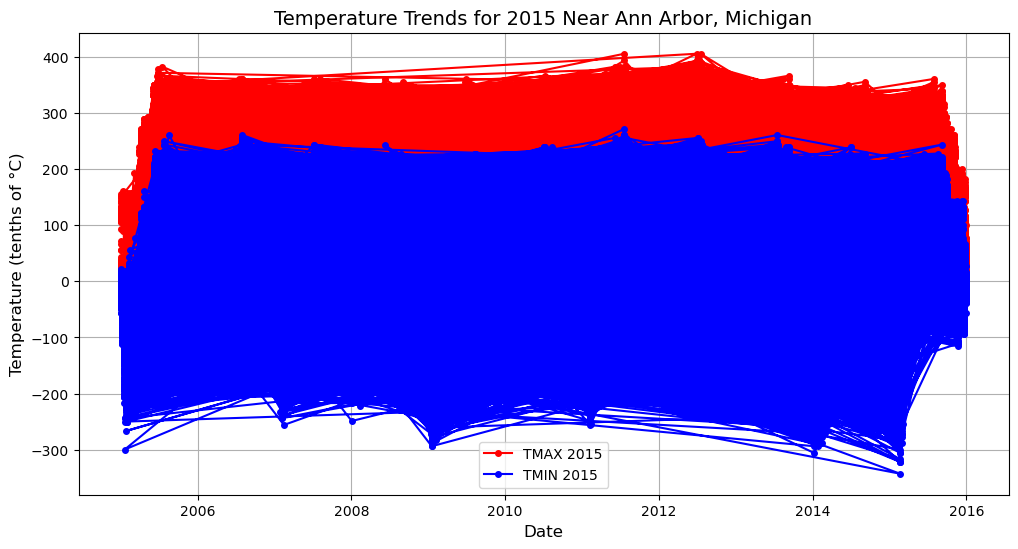

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# Load temperature data for 2015
temperature_2015_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\temperature.csv")
temperature_2015_df['Date'] = pd.to_datetime(temperature_2015_df['Date'])
# Load station data to get LATITUDE and LONGITUDE
binsize_df = pd.read_csv(r"C:\Users\amals\Desktop\Assignment\BinSize.csv")
# Merge temperature data with station data to get LATITUDE and LONGITUDE
temperature_2015_df = temperature_2015_df.merge(binsize_df[['ID', 'LATITUDE', 'LONGITUDE']], on='ID')
# Ann Arbor's latitude and longitude
ann_arbor_lat = 42.2808
ann_arbor_lon = -83.7430
# Function to calculate distance between two lat/lon points using a simple formula
def calculate_distance(lat1, lon1, lat2, lon2):
    # Approximate conversion from degrees to kilometers
    lat_diff = lat2 - lat1
    lon_diff = lon2 - lon1
    return math.sqrt(lat_diff**2 + lon_diff**2) * 111  # 111 km per degree of latitude
# Calculate the distance and filter temperature data for stations within 100 km of Ann Arbor
temperature_2015_near_ann_arbor = temperature_2015_df[
    temperature_2015_df.apply(lambda row: calculate_distance(ann_arbor_lat, ann_arbor_lon, row['LATITUDE'], row['LONGITUDE']) <= 100,axis=1)]
# Filter TMAX and TMIN separately for plotting
tmax_2015 = temperature_2015_near_ann_arbor[temperature_2015_near_ann_arbor['Element'] == 'TMAX']
tmin_2015 = temperature_2015_near_ann_arbor[temperature_2015_near_ann_arbor['Element'] == 'TMIN']
# Plot temperature trends for 2015 near Ann Arbor
plt.figure(figsize=(12, 6))
# Plot TMAX with line and markers
plt.plot(tmax_2015['Date'], tmax_2015['Data_Value'], label='TMAX 2015', color='red', marker='o', linestyle='-', markersize=4)
# Plot TMIN with line and markers
plt.plot(tmin_2015['Date'], tmin_2015['Data_Value'], label='TMIN 2015', color='blue', marker='o', linestyle='-', markersize=4)
# Add title and labels
plt.title('Temperature Trends for 2015 Near Ann Arbor, Michigan', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (tenths of °C)', fontsize=12)
# Add grid and legend
plt.grid(True)
plt.legend()
# Show the plot
plt.show()


#### Explanation:

_The temperature data for 2015 is filtered to include only stations near Ann Arbor.
We then create a line plot for maximum and minimum temperatures over the course of 2015._